In [169]:
# !pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [170]:
arquivo = "../CONSOLIDADO 2024 JAN-DEZ.xlsx"
# df_raw = pd.read_excel(arquivo, header=None)
# df_raw.iloc[:30, :40]

# df_raw.info()

In [171]:
file=pd.ExcelFile(arquivo)
lista_cras=file.sheet_names
# lista_cras

In [172]:
# Ver as primeiras 30 linhas e 30 colunas
# df_total=pd.DataFrame()
df_raw=pd.read_excel(arquivo,sheet_name='CRAS FALCHI',header=None)
    # df_raw['cras']=cras
    # print(cras)
        
# df_raw.iloc[:30, :40]


In [173]:
# SEPARAÇÃO PARA OBTER QUANTIDADE DE PESSOAS

# Lendo a planilha sem cabeçalho
#df_raw = pd.read_excel("/kaggle/input/consolidadorma/CONSOLIDADO 2024 JAN-DEZ.xlsx",sheet_name='CRAS GERAL', header=None)
lista_cras=['CRAS FALCHI',
 'CRAS FEITAL',
 'CRAS MACUCO',
 'CRAS ORATORIO',
 'CRAS PARQUE',
 'CRAS SAO JOAO',
 'CRAS VILA',
 'CRAS ZAIRA',]
# Janeiro até Dezembro (colunas 39 a 50)
meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
         "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]

col_inicio = 39  # coluna Janeiro
col_fim = 50     # coluna Dezembro


In [174]:
# DataFrame com dados das Pessoas
dados_pessoas=pd.DataFrame()

for cras in lista_cras:
    # print(cras)
    # Pegar as três linhas da seção 1.1 (Total, Individual, Coletivo)
    df_raw=pd.read_excel(arquivo,sheet_name=cras,header=None)
    dados = df_raw.iloc[12:15, col_inicio:col_fim+1]
    # Zerar os NaN
    # dados.fillna(value=0,inplace=True) 
    dados.columns = meses
    dados['Tipo'] = ["Total", "Individual", "Coletivo"]
    dados['Unidade'] = cras
    dados_pessoas=pd.concat([dados_pessoas,dados])
dados_pessoas.fillna(value=0,inplace=True) # Ajustando valores vazios
# dados_pessoas

In [175]:
# DataFrame com dados de Atendimento por Faixa de Horário

dados_horario=pd.DataFrame()

for cras in lista_cras:
    df_raw=pd.read_excel(arquivo,sheet_name=cras,header=None)
    dados = df_raw.iloc[16:21, col_inicio:col_fim+1]

    # Definir os índices corretamente
    dados.index = ["08h as 09h59", "10h00 as 11h59", "12h00 as 12h59","13h00 as 14h59","15h00 as 17h00"]
    dados.columns = meses
    dados['Unidade'] = cras
    dados_horario=pd.concat([dados_horario,dados])
dados_horario.fillna(value=0,inplace=True) # Ajustando valores vazios
# dados_horario

In [176]:
# DataFrame de Procedências

dados_procedencias=pd.DataFrame()


tipos_procedencia = [
    "Associações", "Atendimento Agendado", "Busca Ativa", "Cadastro Único",
    "Câmara Municipal", "Conselho Tutelar", "Defensoria Pública",
    "Demanda Espontânea", "Educação", "Indicação Informal", "INSS",
    "Retorno de Acompanhamento", "Retorno de Agendamento",
    "Retorno de Atividades do CRAS", "Saúde",
    "Secretaria de Assistência Social", "Segurança Alimentar",
    "Unidades PSB", "Unidades PSE", "Usuário do CRAS", "Outro"
]

for cras in lista_cras:
    df_raw=pd.read_excel(arquivo,sheet_name=cras,header=None)
    procedencia = df_raw.iloc[22:43, col_inicio:col_fim+1]
    # procedencia.index = tipos_procedencia[:len(procedencia)]
    # dados = df_raw.iloc[16:21, col_inicio:col_fim+1]

    # Definir os índices corretamente
    procedencia.columns = meses
    procedencia['procedencia']=tipos_procedencia[:len(procedencia)]
    procedencia['Unidade'] = cras
    dados_procedencias=pd.concat([dados_procedencias,procedencia])
    # print(procedencia)
dados_procedencias.fillna(value=0,inplace=True) # Ajustando valores vazios
# dados_procedencias

In [177]:
# Dados de Demandas

dados_demandas = pd.DataFrame()

# df_raw=pd.read_excel(arquivo,sheet_name='CRAS GERAL',header=None)
# Pegar os nomes das demandas na coluna A (coluna 0)

for cras in lista_cras:
    df_raw=pd.read_excel(arquivo,sheet_name=cras,header=None)
    nomes_demandas = df_raw.iloc[45:76, 0].tolist()
    demandas = df_raw.iloc[44:74, col_inicio:col_fim+1]
    demandas.columns = meses
    demandas['demandas']=nomes_demandas[:len(demandas)]
    demandas['Unidade'] = cras
    # print(demandas)
    dados_demandas=pd.concat([dados_demandas,demandas])
dados_demandas.fillna(value=0,inplace=True) # Ajustando valores vazios
# dados_demandas



In [178]:
# Dados sobre Tipo de Atendimento

dados_tipo_atendimentos=pd.DataFrame()

# df_raw=pd.read_excel(arquivo,sheet_name='CRAS GERAL',header=None)
# Pegar os nomes das demandas na coluna A (coluna 0)

for cras in lista_cras:
    df_raw=pd.read_excel(arquivo,sheet_name=cras,header=None)
    # Pegar as três linhas da seção
    tipo_atendimentos = df_raw.iloc[80:83, col_inicio:col_fim+1]

    # Pegar os nomes das demandas na coluna A (coluna 0)
    lista_tipo_atendimentos = df_raw.iloc[80:83, 0].tolist()
    tipo_atendimentos.columns=meses
    tipo_atendimentos['tipo_atendimentos']=lista_tipo_atendimentos[:len(tipo_atendimentos)]
    tipo_atendimentos['Unidade']=cras
    dados_tipo_atendimentos=pd.concat([dados_tipo_atendimentos,tipo_atendimentos])
dados_tipo_atendimentos.fillna(value=0,inplace=True)
# dados_tipo_atendimentos

In [179]:
# Dados sobre Nacionalidade

dados_nacionalidade=pd.DataFrame()
for cras in lista_cras:
    df_raw=pd.read_excel(arquivo,sheet_name=cras,header=None)
    nacionalidade = df_raw.iloc[84:91, col_inicio:col_fim+1]
    
    # Pegar os nomes das demandas na coluna A (coluna 0)
    lista_nacionalidade = df_raw.iloc[84:91, 0].tolist()
    nacionalidade.columns=meses
    nacionalidade['nacionalidade']=lista_nacionalidade[:len(nacionalidade)]
    nacionalidade['Unidade']=cras
    dados_nacionalidade=pd.concat([dados_nacionalidade,nacionalidade])
dados_nacionalidade.fillna(value=0,inplace=True)
# dados_nacionalidade

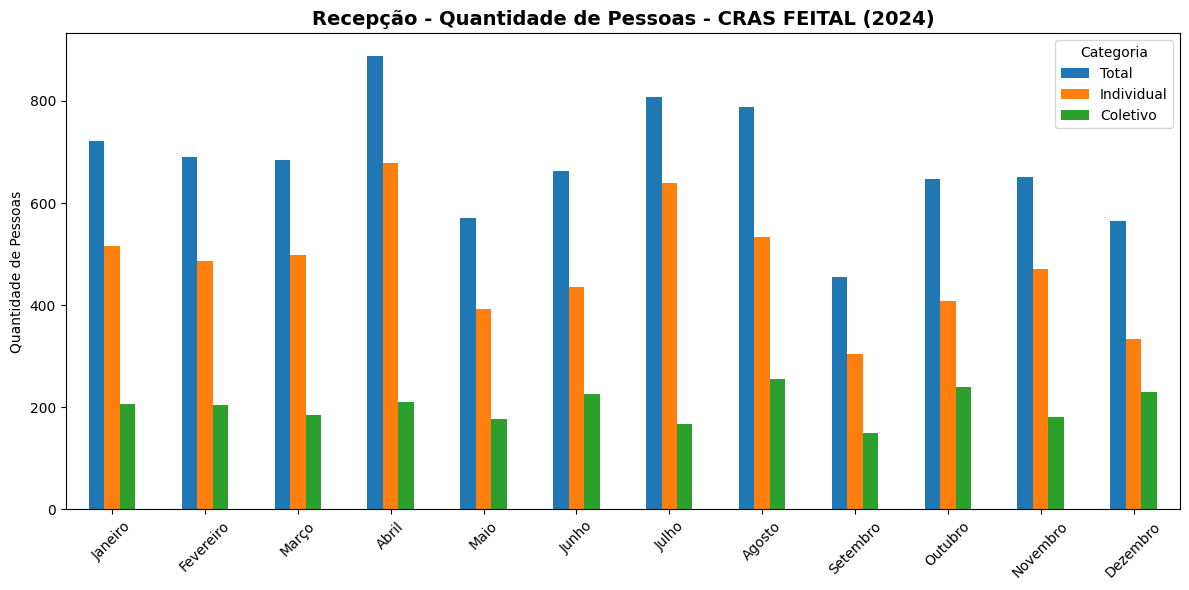

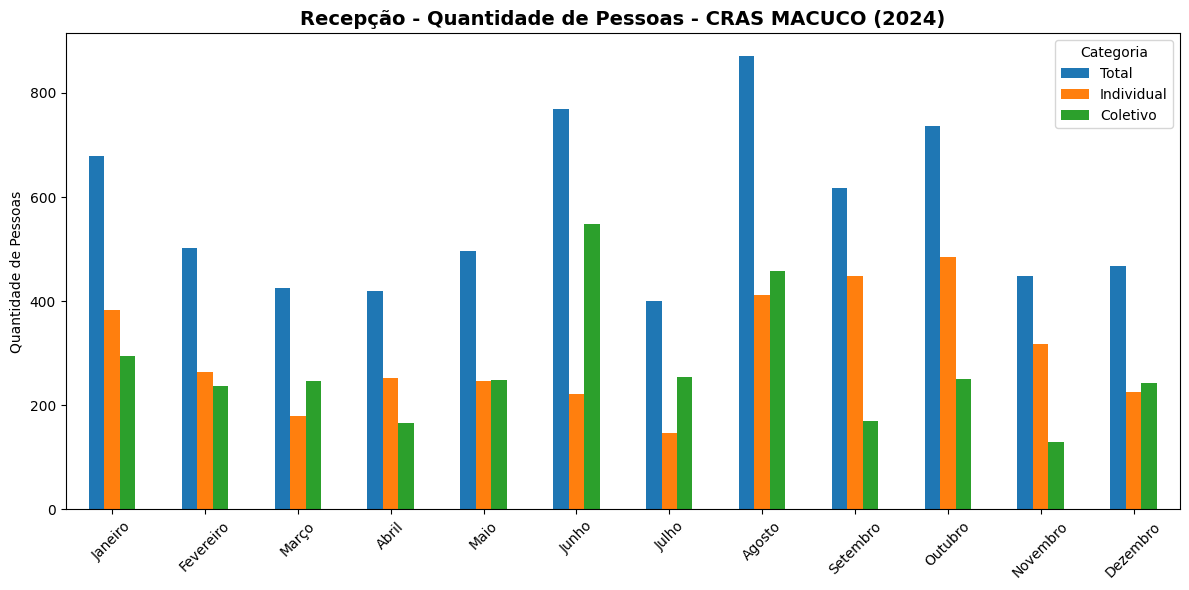

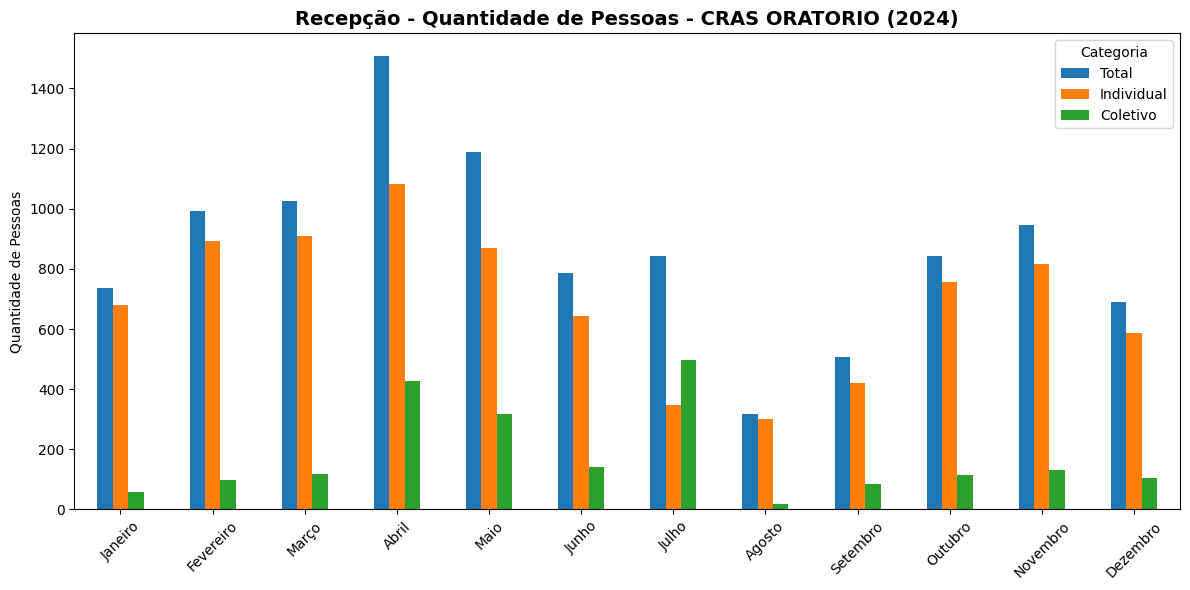

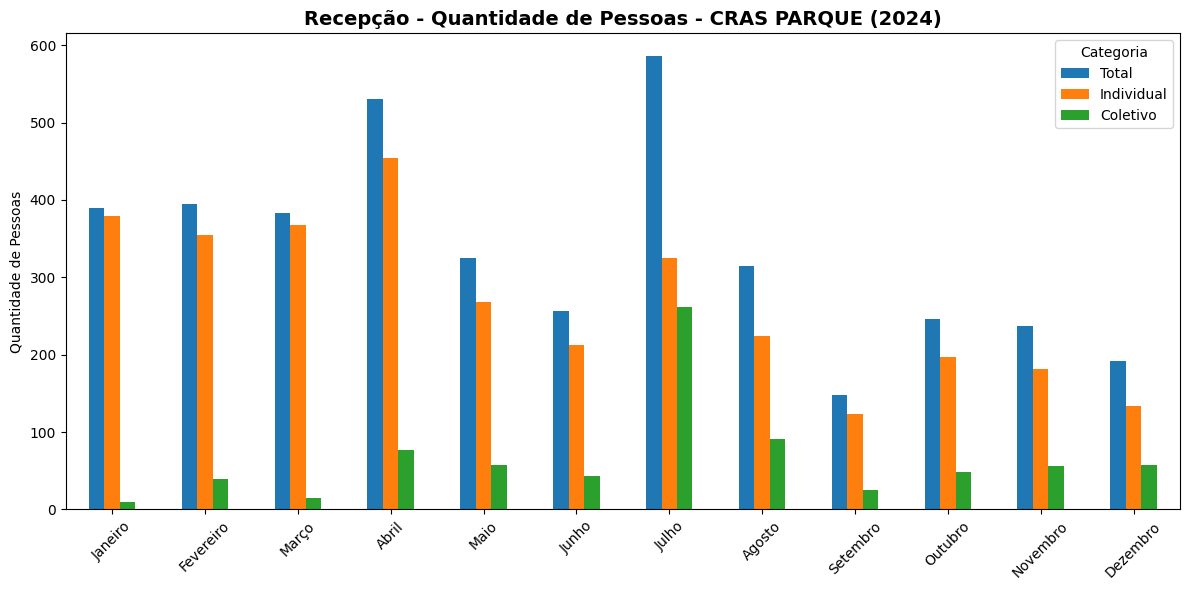

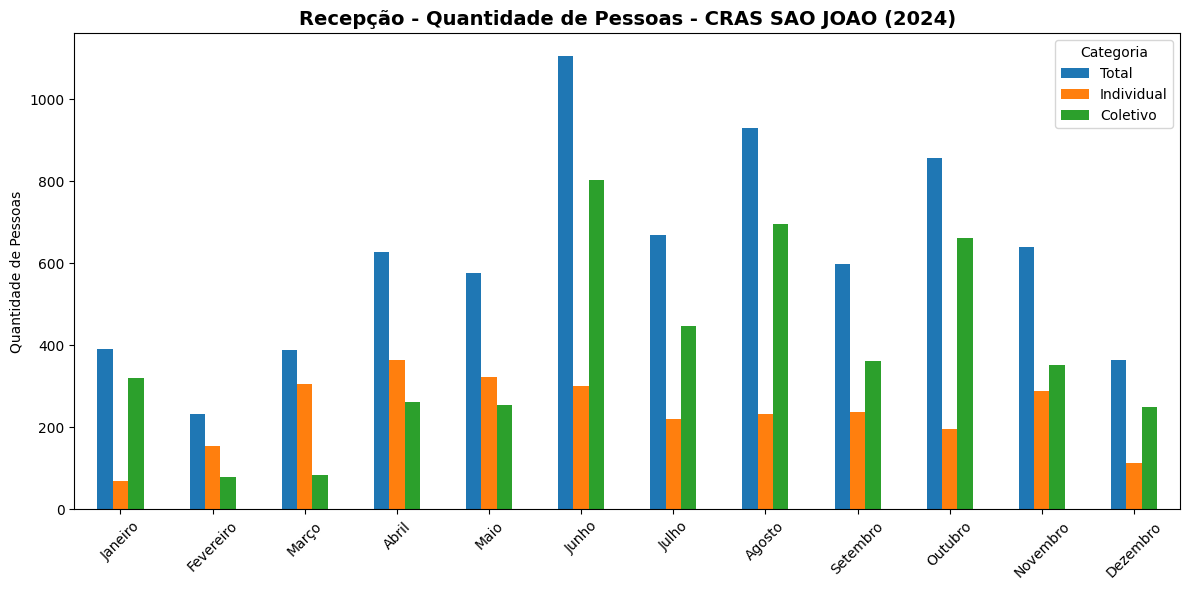

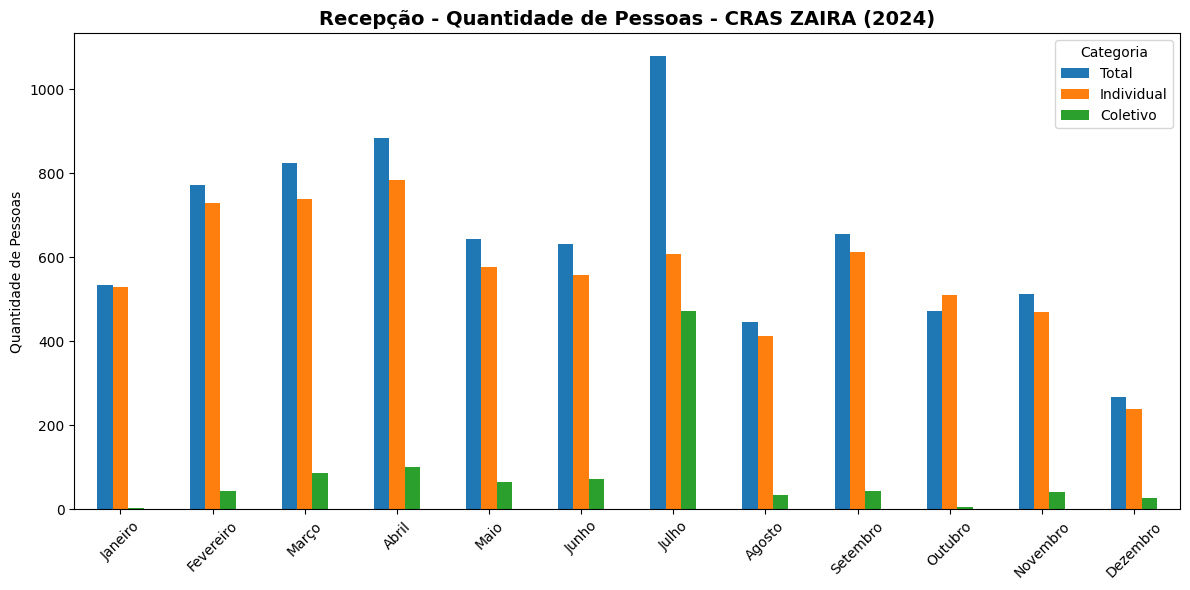

In [180]:
# --- Plot Quantidade Pessoas ---
for cras in lista_cras:
    dados_plotar=dados_pessoas[dados_pessoas['Unidade']==cras]
    # print(dados_plotar)
    dados_plotar.index=dados_plotar['Tipo']
    dados_plotar=dados_plotar.loc[:,'Janeiro':'Dezembro']
    # print(dados_plotar)
    dados_plotar.T.plot(kind="bar", figsize=(12,6))
    plt.title(f"Recepção - Quantidade de Pessoas - {cras} (2024)", fontsize=14, fontweight="bold")
    plt.ylabel("Quantidade de Pessoas")
    plt.xticks(rotation=45)
    plt.legend(title="Categoria")
    plt.tight_layout()
    plt.show()

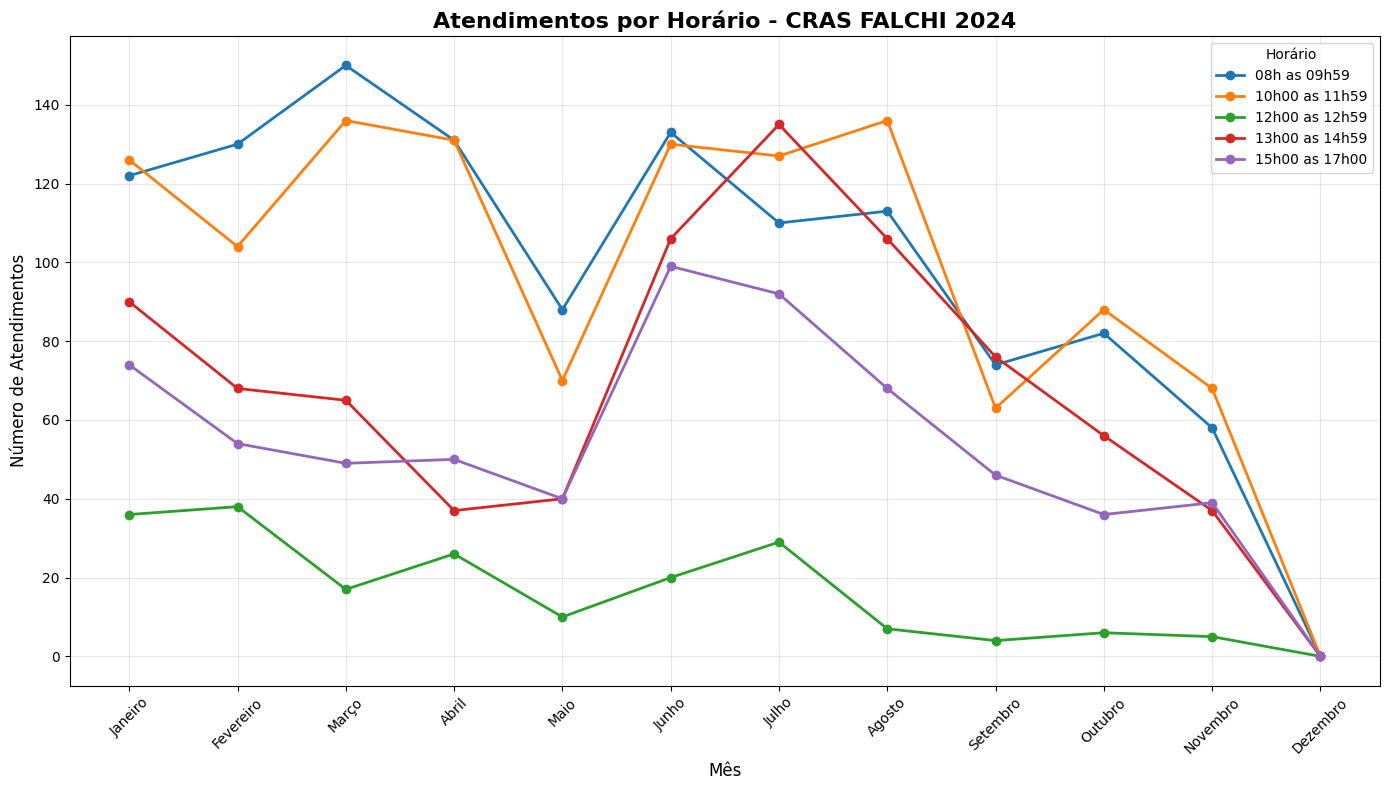

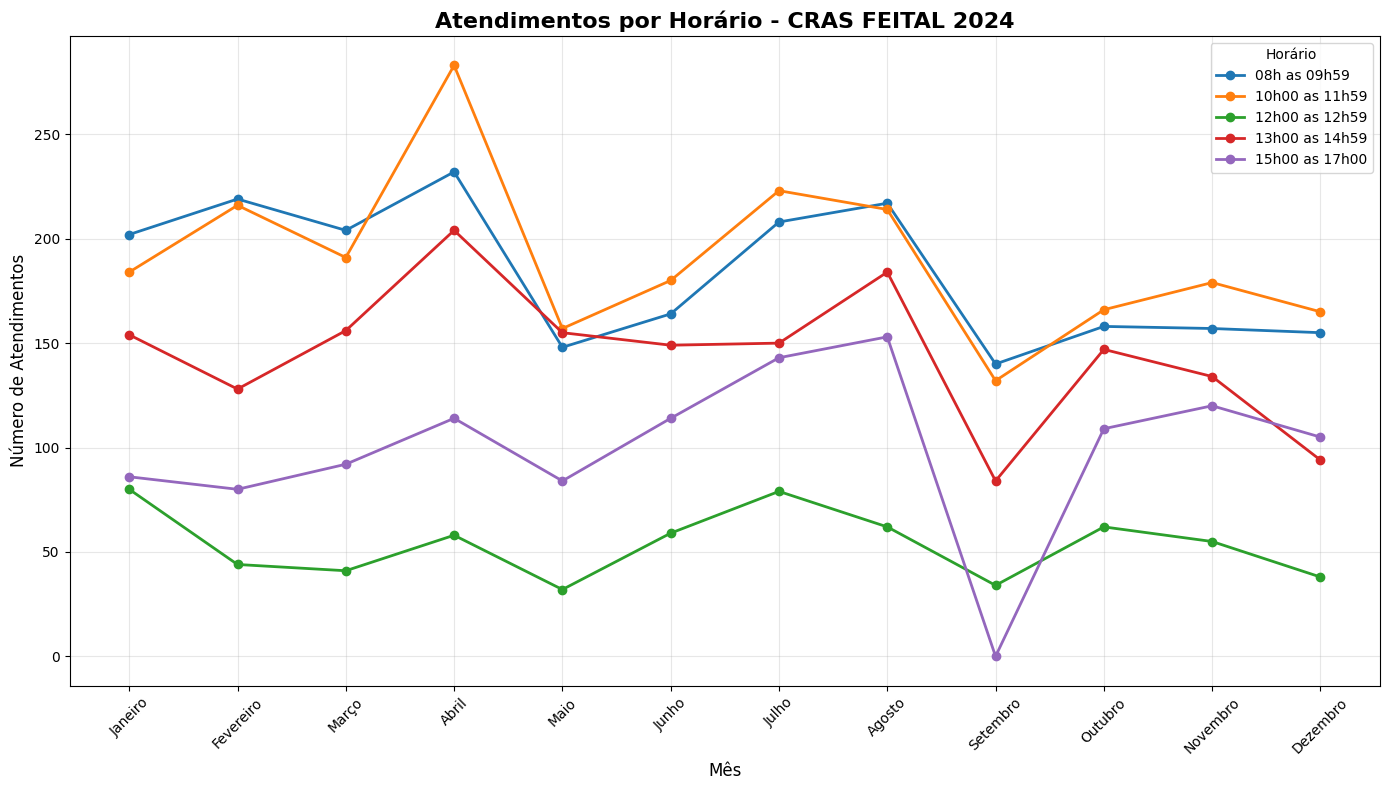

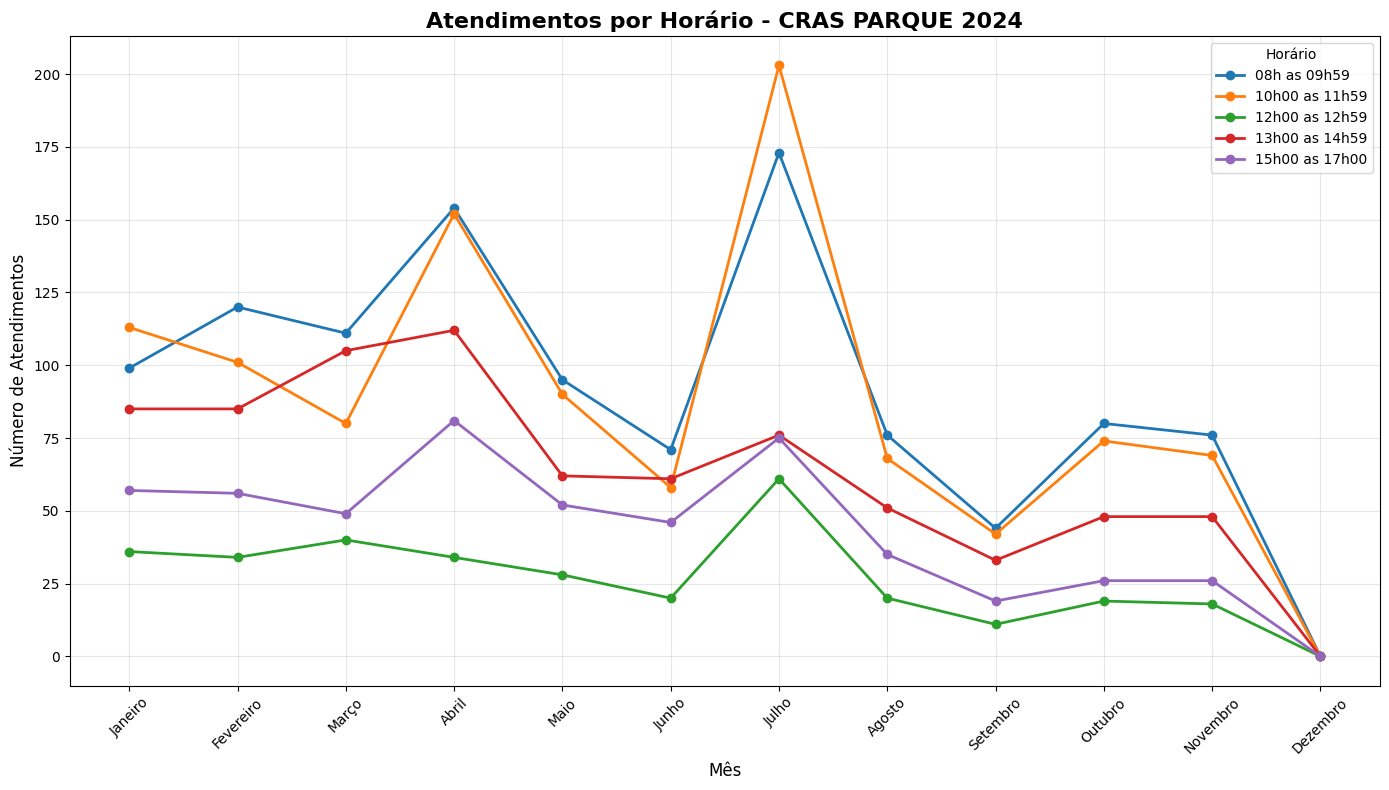

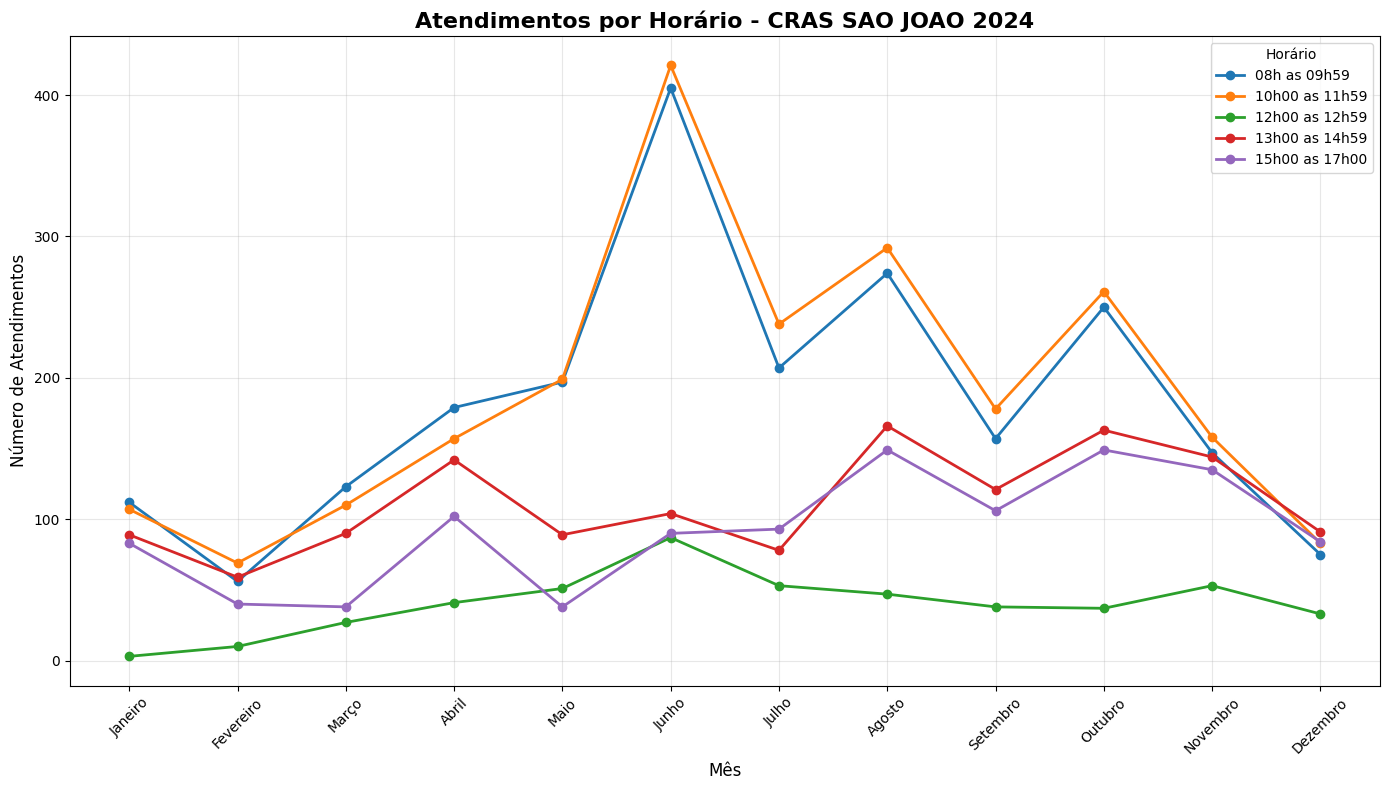

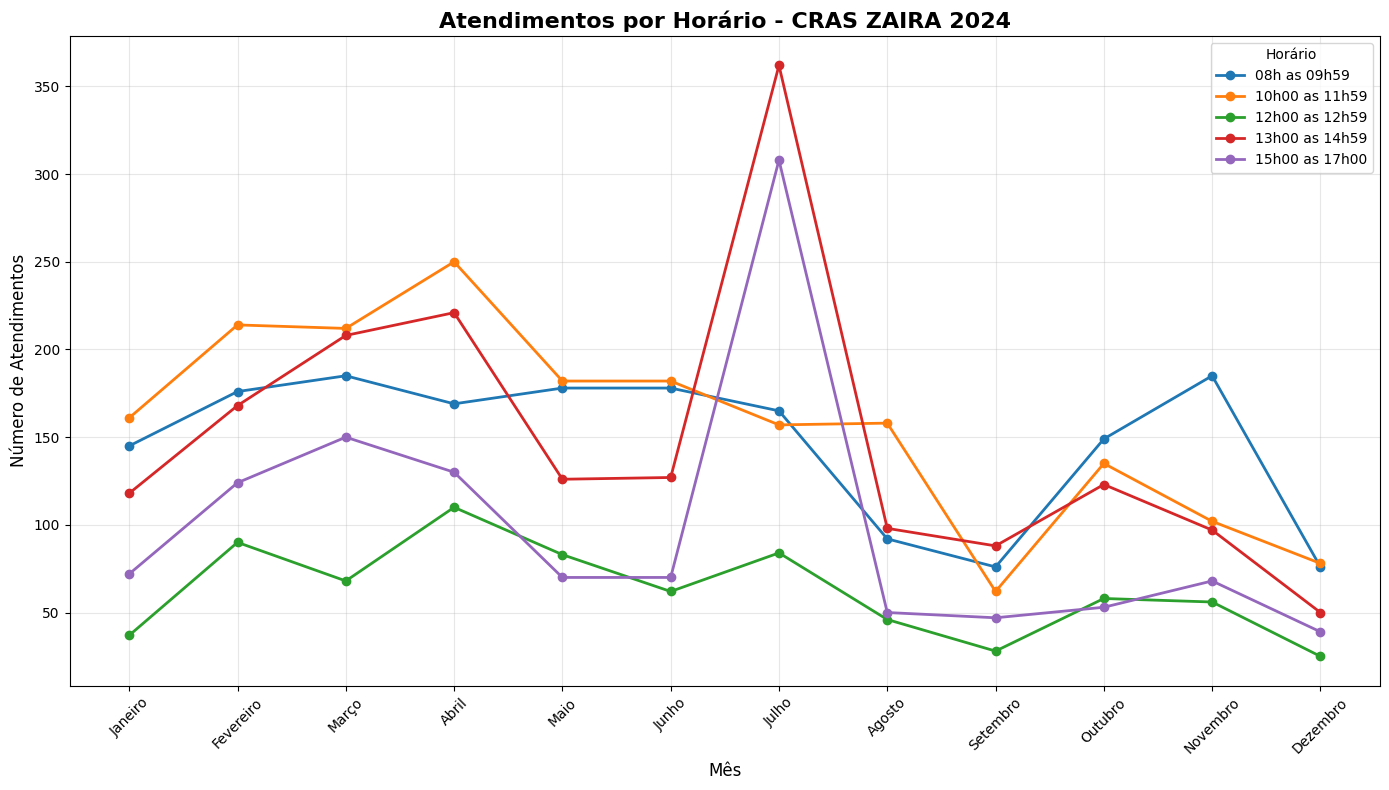

In [181]:
# Plot Atendimento Horario

for cras in lista_cras:
    # print(cras)
    dados = dados_horario[dados_horario['Unidade']==cras]
    # print(dados_cras)
    dados = dados.loc[:,'Janeiro':'Dezembro']
    # Criação da figura
    plt.figure(figsize=(14, 8))

    # Plotar cada faixa de horário
    for horario in dados.index:
        plt.plot(dados.columns, dados.loc[horario], marker='o', linewidth=2, label=horario)

    # Títulos e legendas
    plt.title(f"Atendimentos por Horário - {cras} 2024", fontsize=16, fontweight='bold')
    plt.xlabel("Mês", fontsize=12)
    plt.ylabel("Número de Atendimentos", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.legend(title="Horário", fontsize=10)

    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

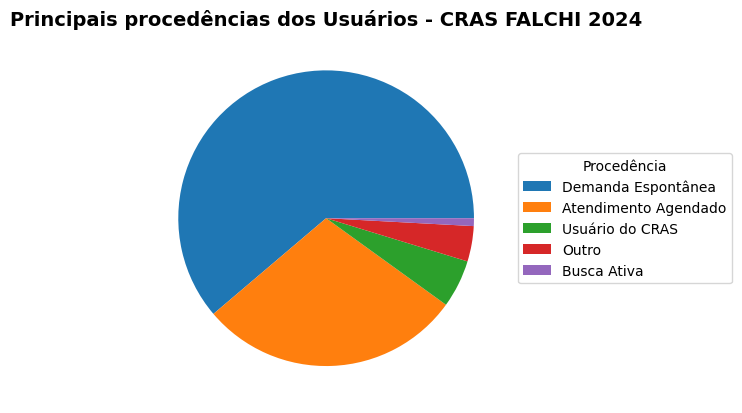

<Figure size 1200x600 with 0 Axes>

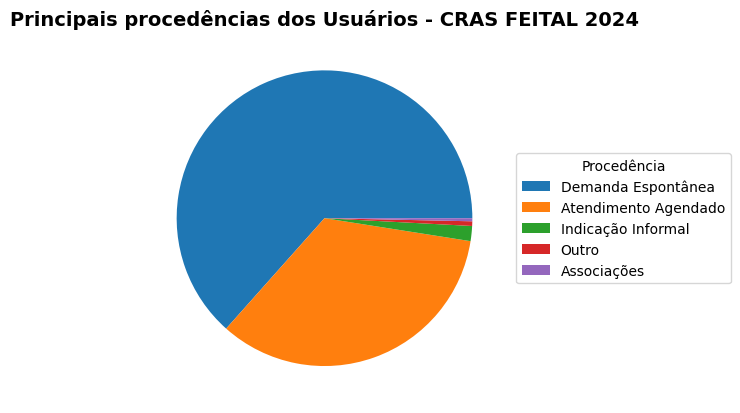

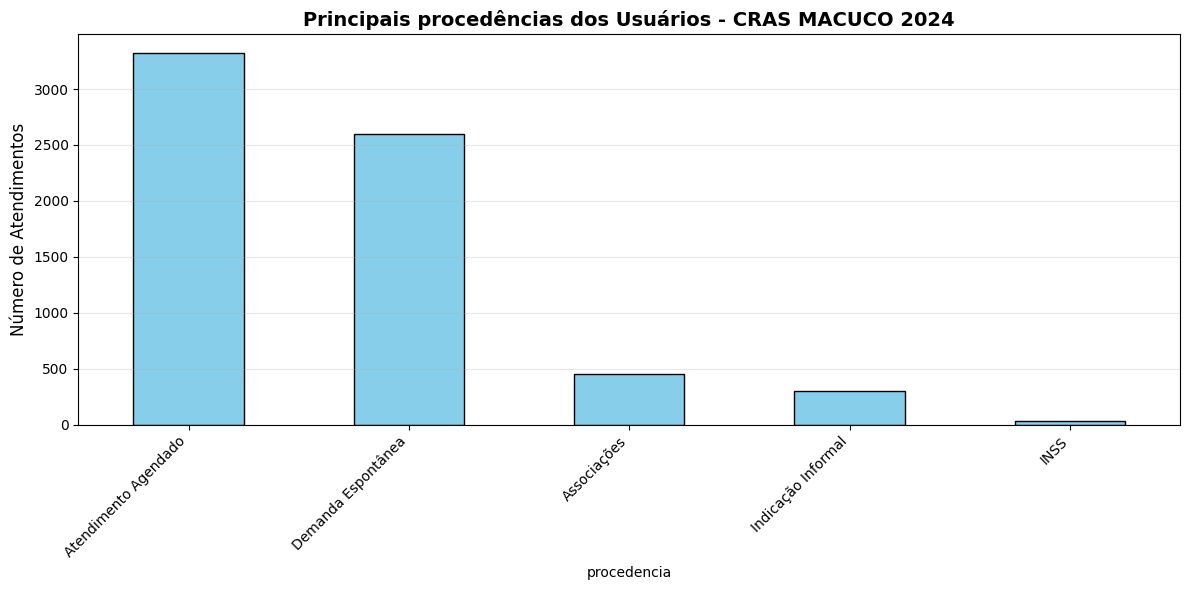

<Figure size 1200x600 with 0 Axes>

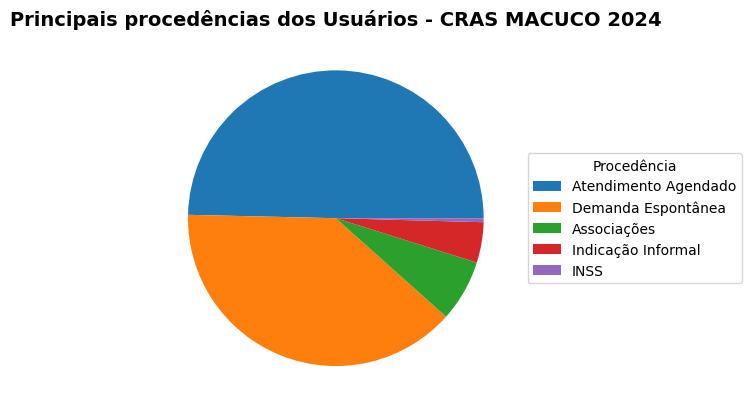

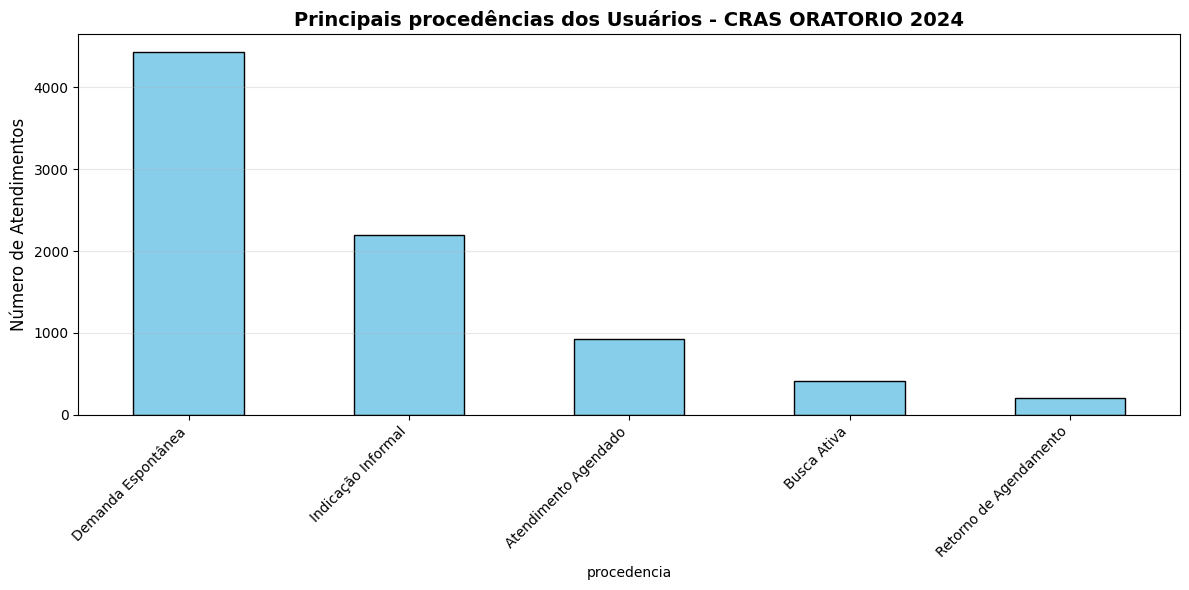

<Figure size 1200x600 with 0 Axes>

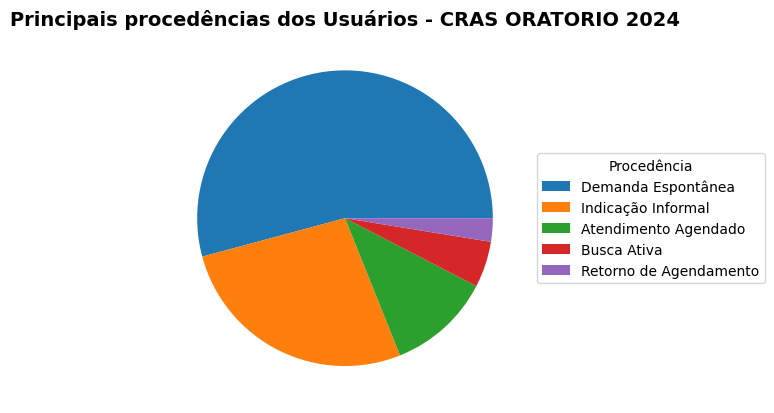

<Figure size 1200x600 with 0 Axes>

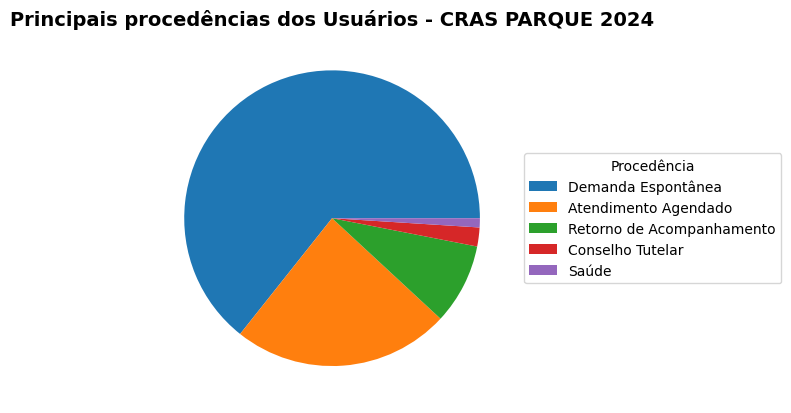

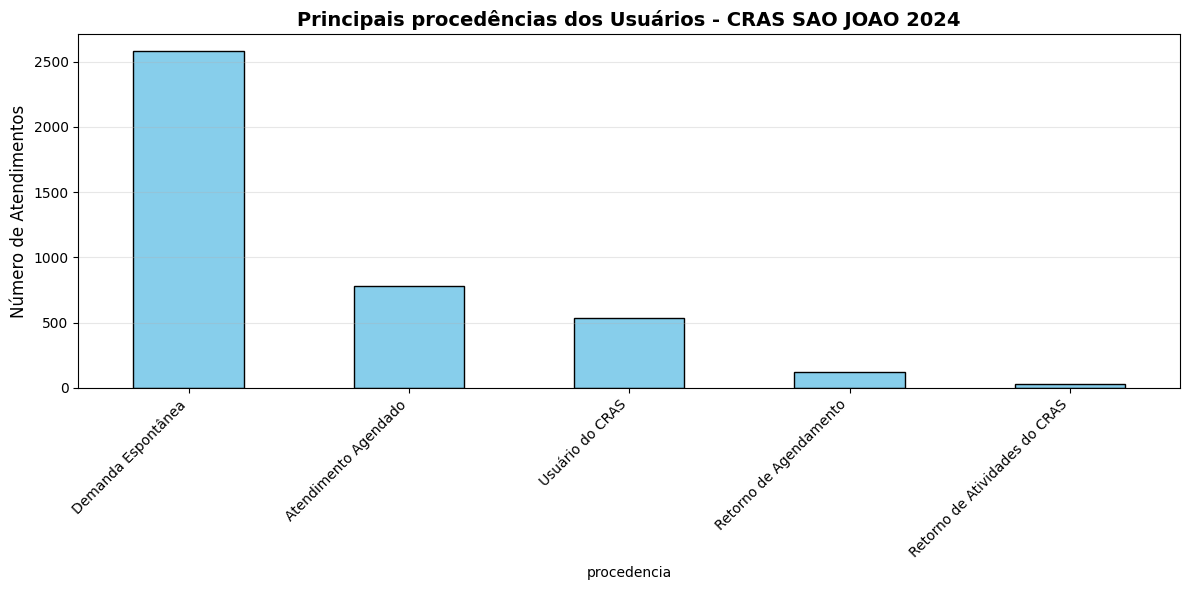

<Figure size 1200x600 with 0 Axes>

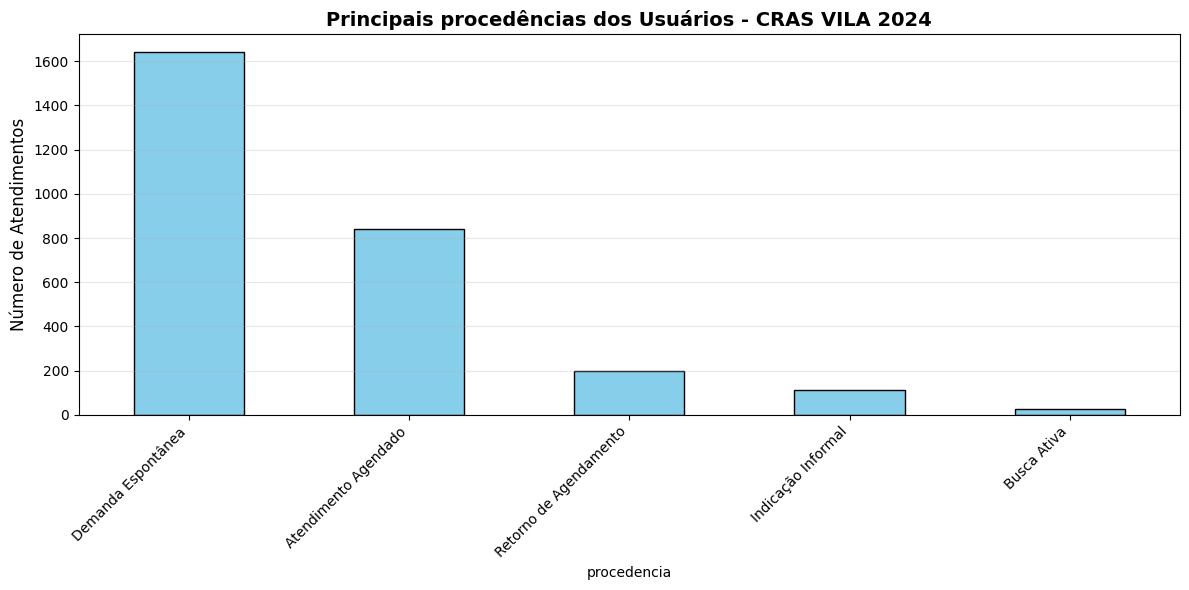

<Figure size 1200x600 with 0 Axes>

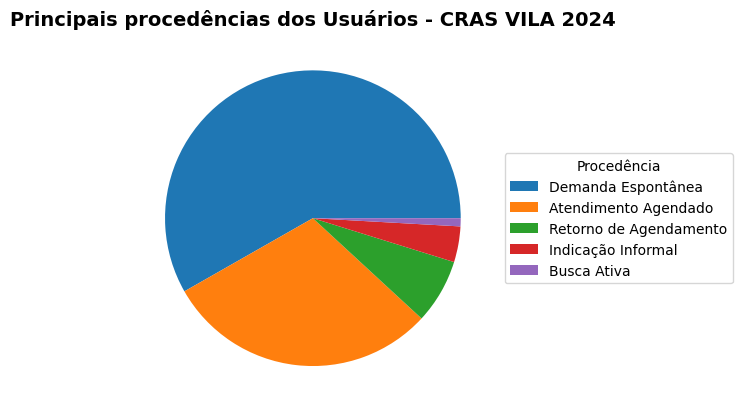

<Figure size 1200x600 with 0 Axes>

In [182]:
# Plot Procedência Usuário

for cras in lista_cras:
    # print(cras)
    dados = dados_procedencias[dados_procedencias['Unidade']==cras]
    # print(dados)
    indice=dados['procedencia']
    # print(indice)
    dados = dados.loc[:,'Janeiro':'Dezembro']
    dados.index=indice[:len(dados)]
    totais = dados.sum(axis=1)
    top_procedencia = totais.sort_values(ascending=False).head(5)

    # Gráfico de Barras
    plt.figure(figsize=(12,6))
    top_procedencia.plot(kind="bar",color="skyblue",edgecolor="black")
    plt.title(f"Principais procedências dos Usuários - {cras} 2024", fontsize=14, fontweight='bold')
    plt.ylabel("Número de Atendimentos", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico de Pizza
    plt.figure(figsize=(12,6))
    fig,ax = plt.subplots()
    plt.title(f"Principais procedências dos Usuários - {cras} 2024", fontsize=14, fontweight='bold')
    labels=top_procedencia.reset_index()
    dados=top_procedencia
    # print(dados)
    wedges, text = ax.pie(dados)
    ax.legend(wedges,top_procedencia.index,
              title="Procedência",
              loc='center left',
              bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

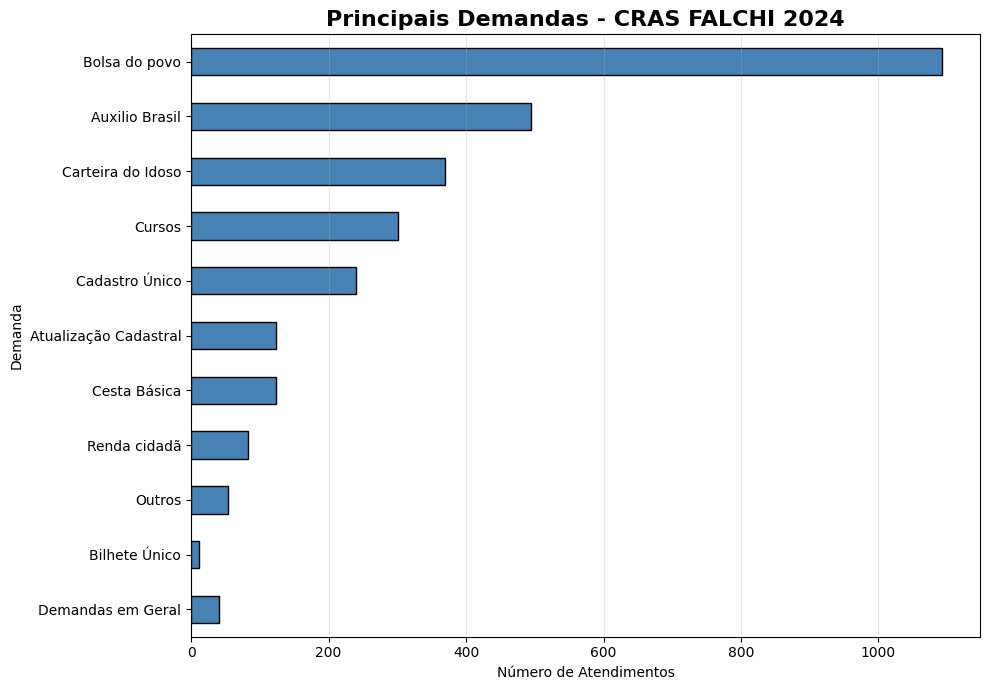

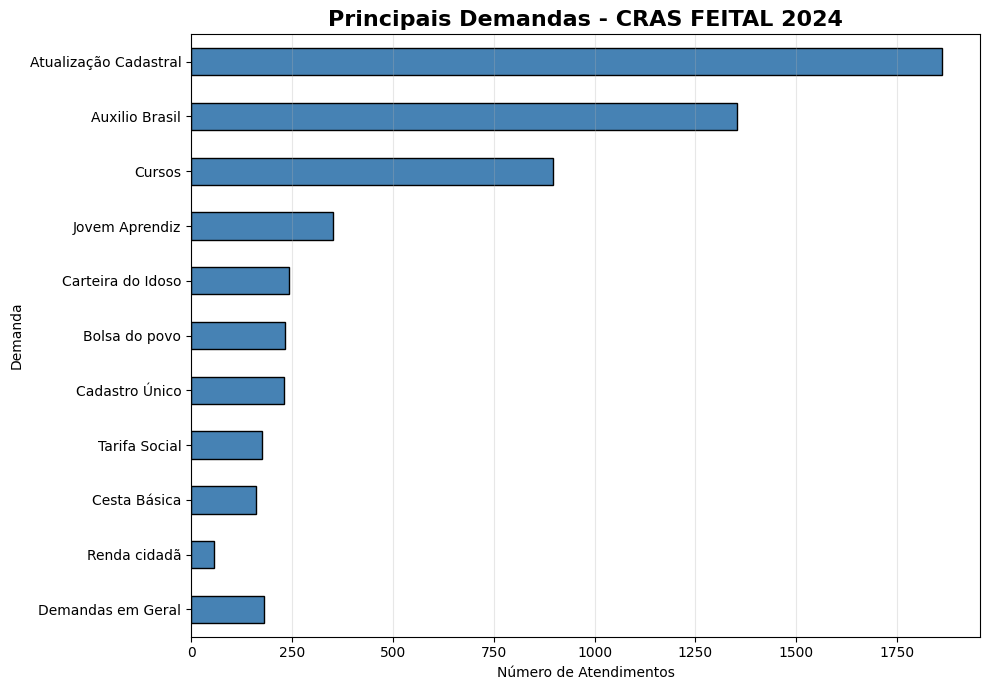

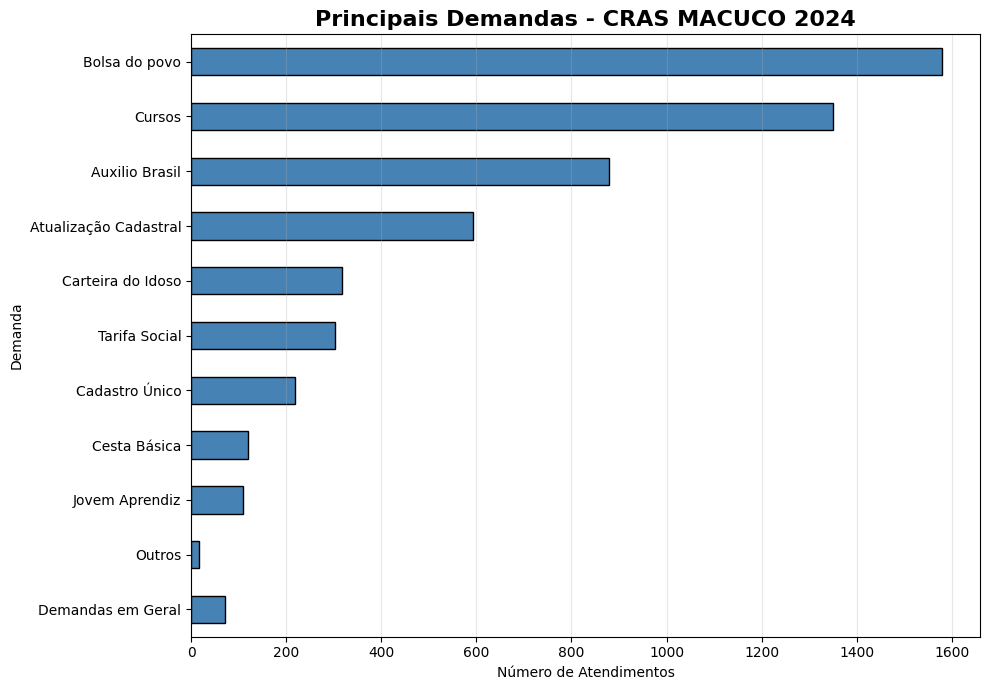

In [183]:
# Plot Principais Demandas

for cras in lista_cras:
    demandas=dados_demandas[dados_demandas['Unidade']==cras]

    demandas.index=demandas['demandas'].iloc[:len(demandas)]
    demandas=demandas.loc[:,'Janeiro':'Dezembro']
    # print(demandas)
    # Somar o total por demanda ao longo do ano
    totais_demandas = demandas.sum(axis=1)

    # print(totais_demandas)

    # Selecionar top 10 demandas
    top_demandas = totais_demandas.sort_values(ascending=False).head(10)

    total_demandas=totais_demandas.sum()
    total_top_demandas=top_demandas.sum()
    top_demandas['Demandas em Geral']=total_demandas-total_top_demandas

    # print(total_demandas,total_top_demandas)

    # Plotar gráfico
    plt.figure(figsize=(10, 7))
    top_demandas.plot(kind="barh", color="steelblue", edgecolor="black")

    plt.title(f"Principais Demandas - {cras} 2024", fontsize=16, fontweight="bold")
    plt.xlabel("Número de Atendimentos")
    plt.ylabel("Demanda")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", alpha=0.3)
    
    plt.tight_layout()
    plt.show()


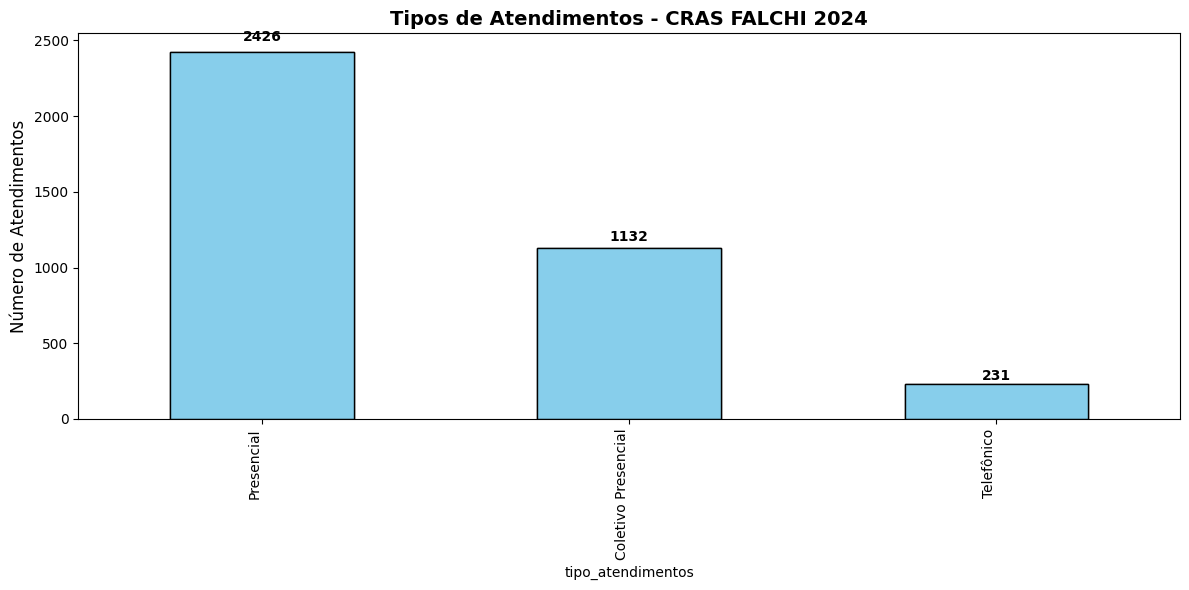

<Figure size 1200x600 with 0 Axes>

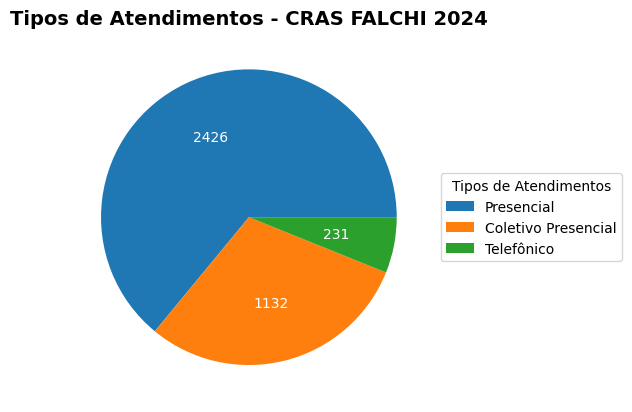

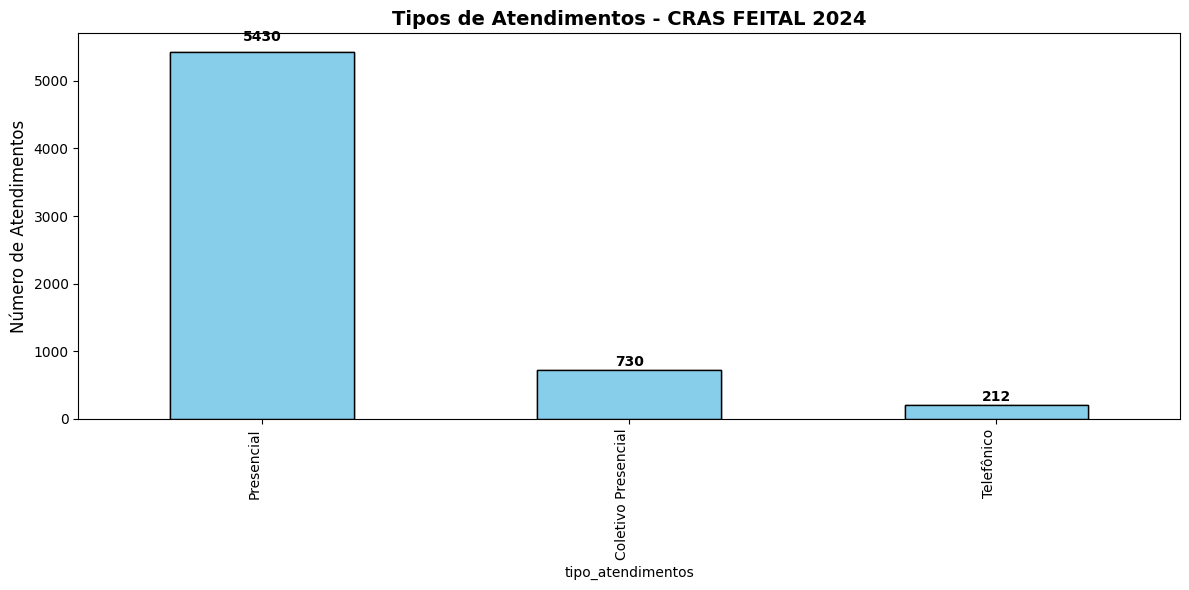

<Figure size 1200x600 with 0 Axes>

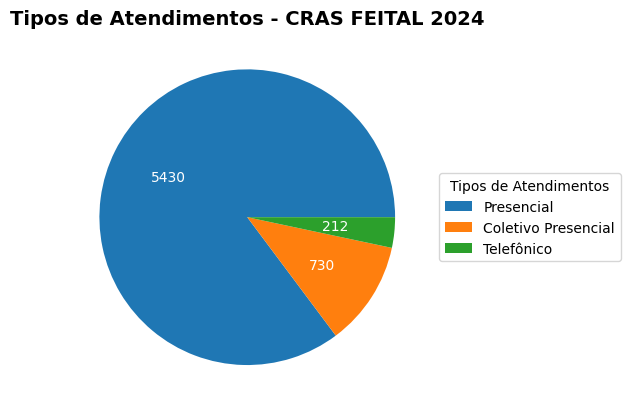

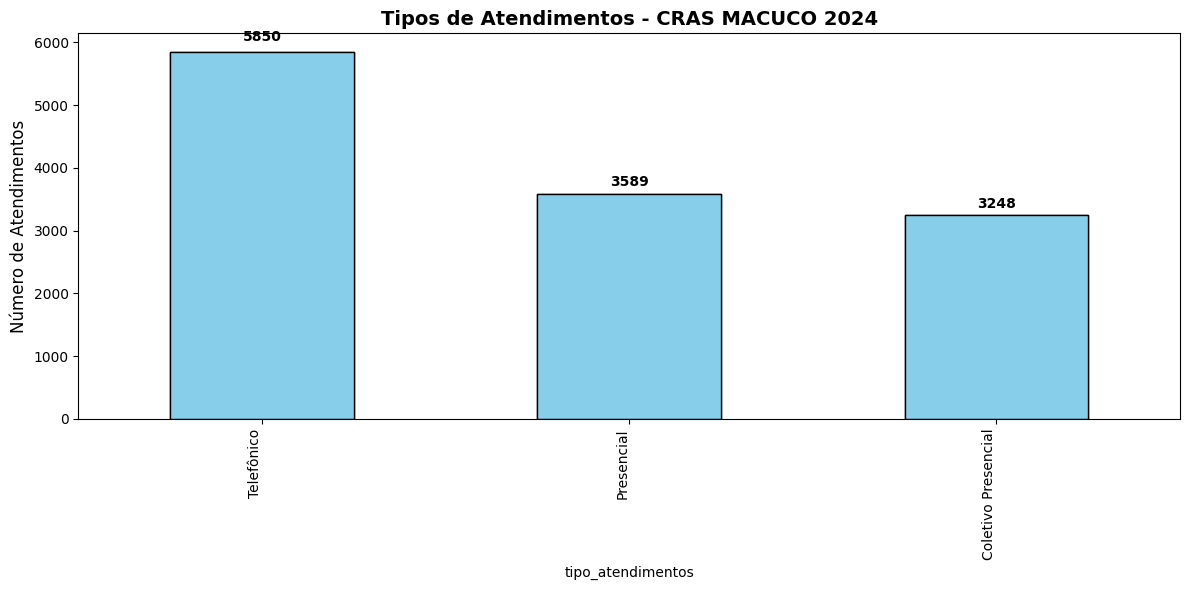

<Figure size 1200x600 with 0 Axes>

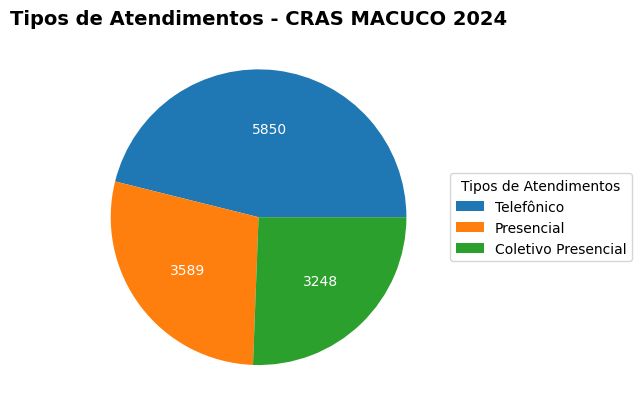

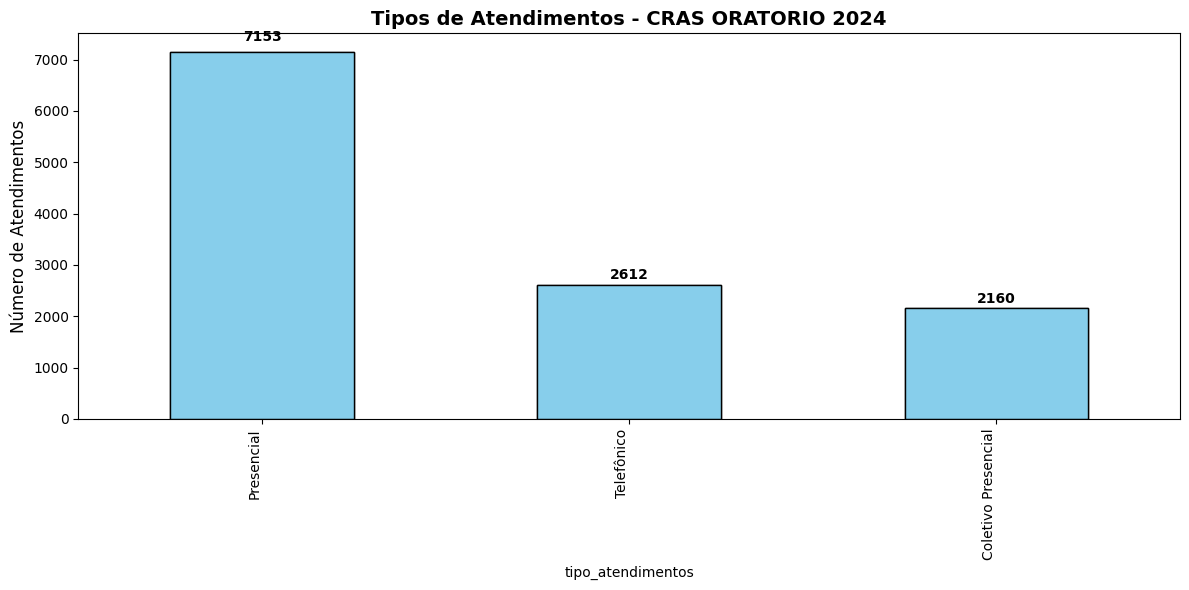

<Figure size 1200x600 with 0 Axes>

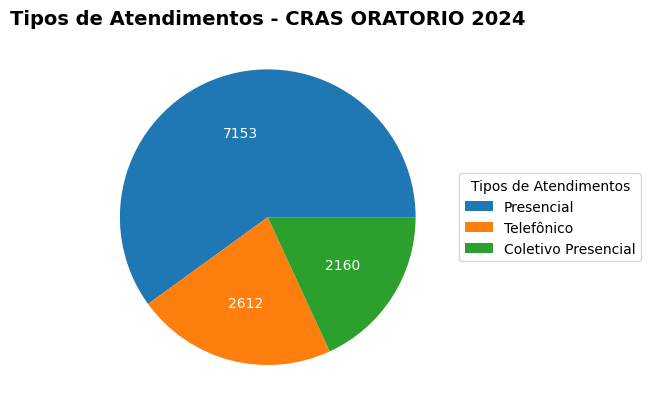

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

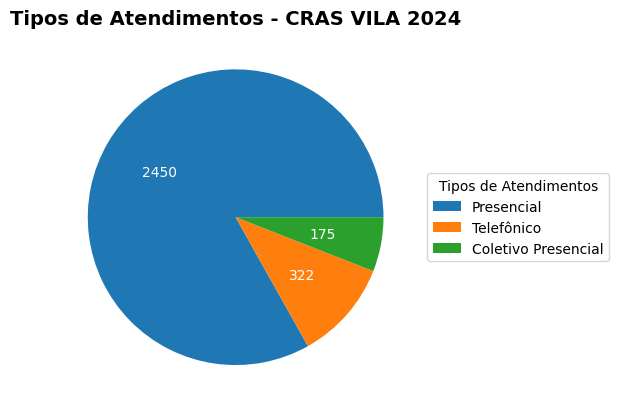

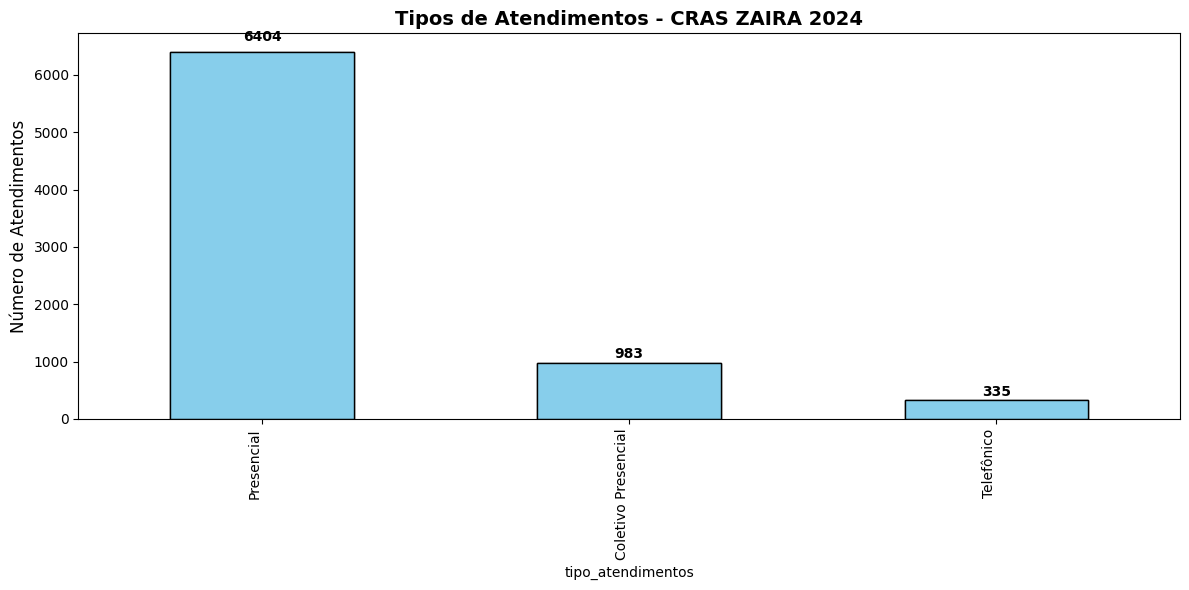

<Figure size 1200x600 with 0 Axes>

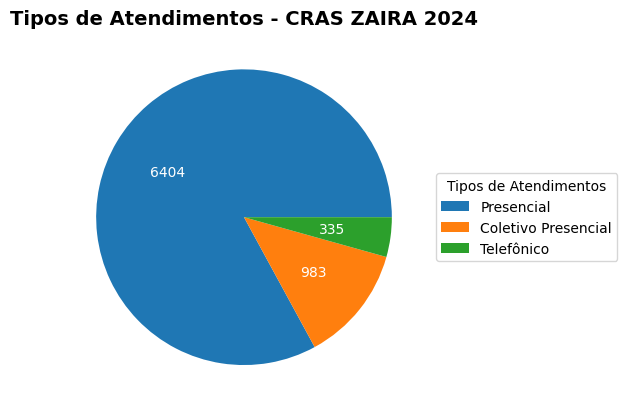

In [186]:
#Plot Tipo de atendimentos
# import numpy as np
for cras in lista_cras:
    tipos=dados_tipo_atendimentos[dados_tipo_atendimentos['Unidade']==cras]
    # print(tipos)
    tipos.index=tipos['tipo_atendimentos'].iloc[:len(tipos)]
    tipos=tipos.loc[:,'Janeiro':'Dezembro']

    totais_tipos_atendimentos = tipos.sum(axis=1)
    # print(totais_tipos_atendimentos)
    top_tipo_atendimentos = totais_tipos_atendimentos.sort_values(ascending=False).head(5)

    # Gráfico de Barras
    plt.figure(figsize=(12,6))
    top_tipo_atendimentos.plot(kind="bar",color="skyblue",edgecolor="black")
    plt.title(f"Tipos de Atendimentos - {cras} 2024", fontsize=14, fontweight='bold')
    plt.ylabel("Número de Atendimentos", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", alpha=0.3)
    # salva o gráfico em "ax"
    ax = top_tipo_atendimentos.plot(kind="bar", color="skyblue", edgecolor="black")
    #rótulo de dados
    for i, v in enumerate(top_tipo_atendimentos):
        ax.text(i, v + (v*0.02), str(int(v)), ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Gráfico de Pizza

    def func(pct,valor):
        # absolute = int(np.round(pct/100.*np.sum(allvals)))
        valores=np(valor)
        return f"{valor}"
    
    plt.figure(figsize=(12,6))
    fig,ax = plt.subplots()
    plt.title(f"Tipos de Atendimentos - {cras} 2024", fontsize=14, fontweight='bold')
    labels=top_tipo_atendimentos.reset_index()
    dados=top_tipo_atendimentos
    data = [x for x in dados]
    # print(data)
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute:d}"
    wedges, text, autotext = ax.pie(dados, autopct=lambda pct: func(pct,data),
                                  textprops=dict(color="w"))
    ax.legend(wedges,top_tipo_atendimentos.index,
              title="Tipos de Atendimentos",
              loc='center left',
              bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

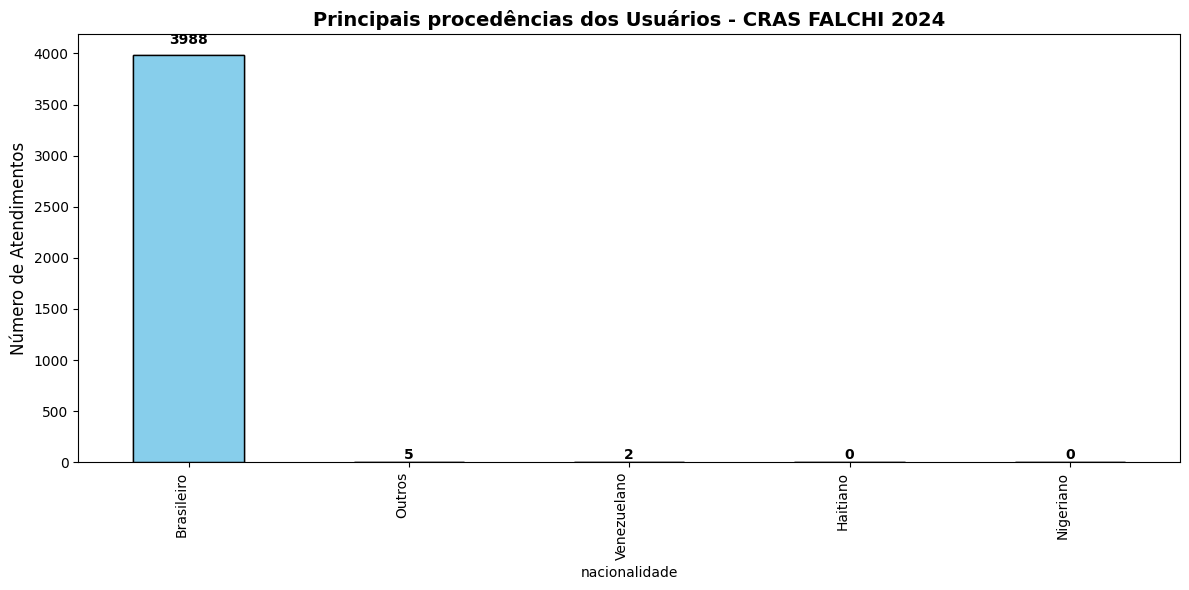

<Figure size 1200x600 with 0 Axes>

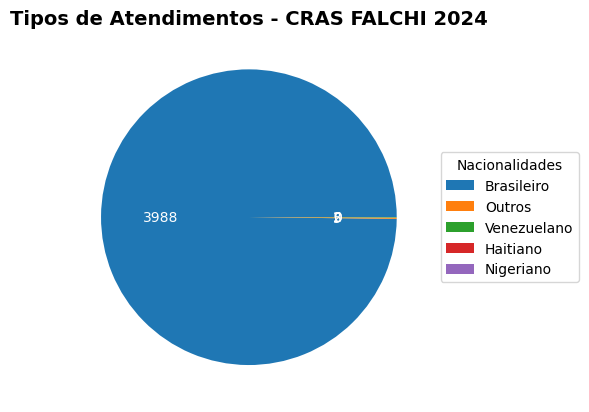

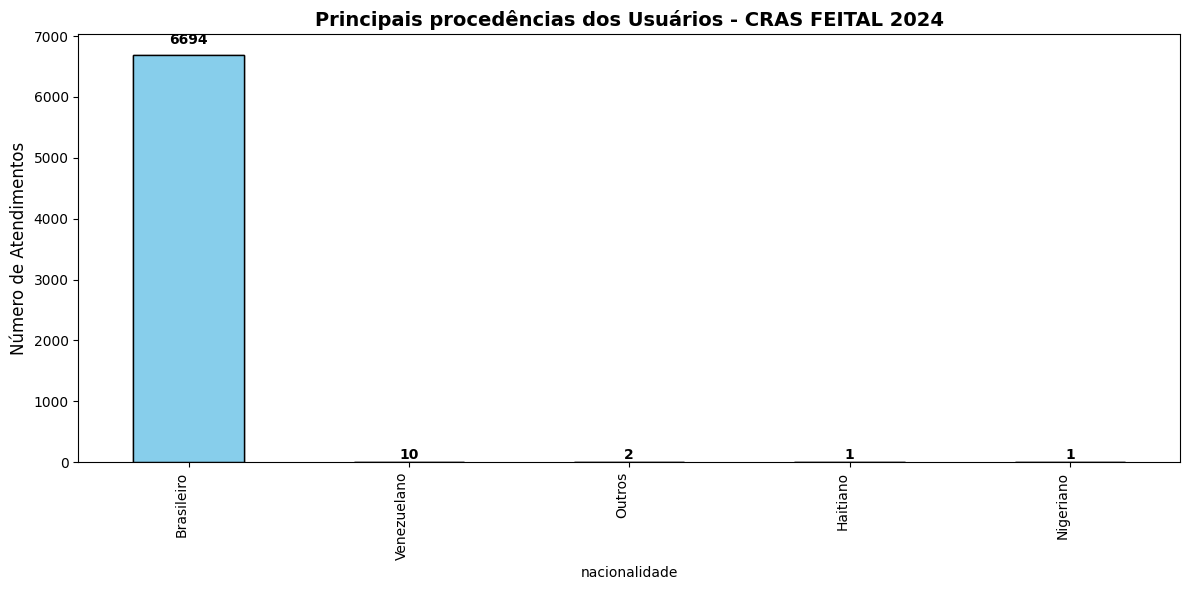

<Figure size 1200x600 with 0 Axes>

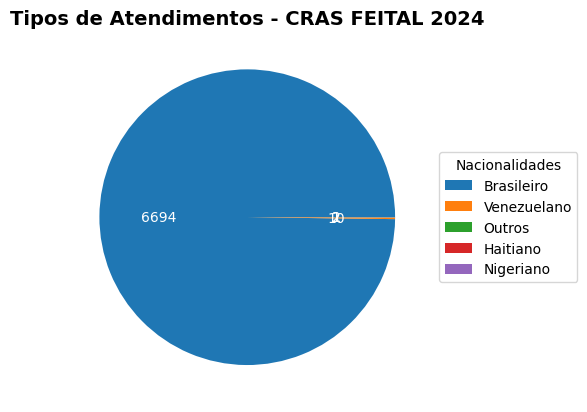

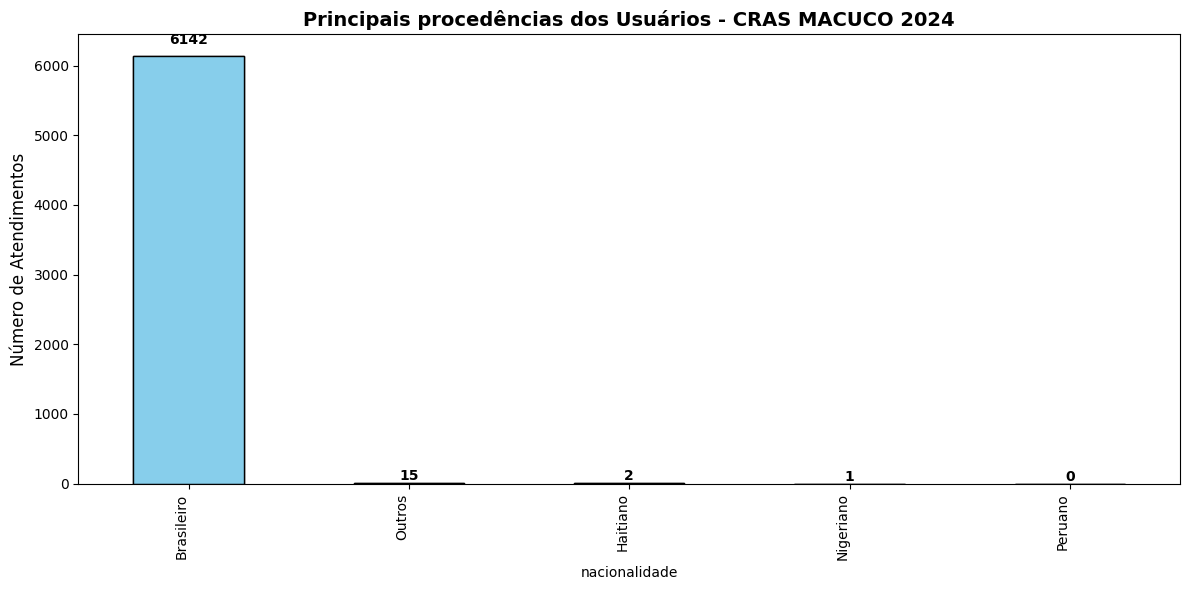

<Figure size 1200x600 with 0 Axes>

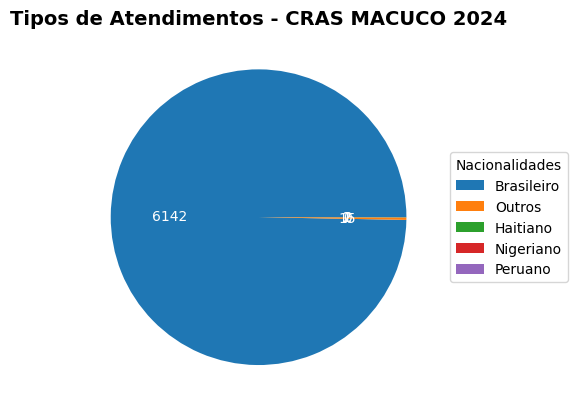

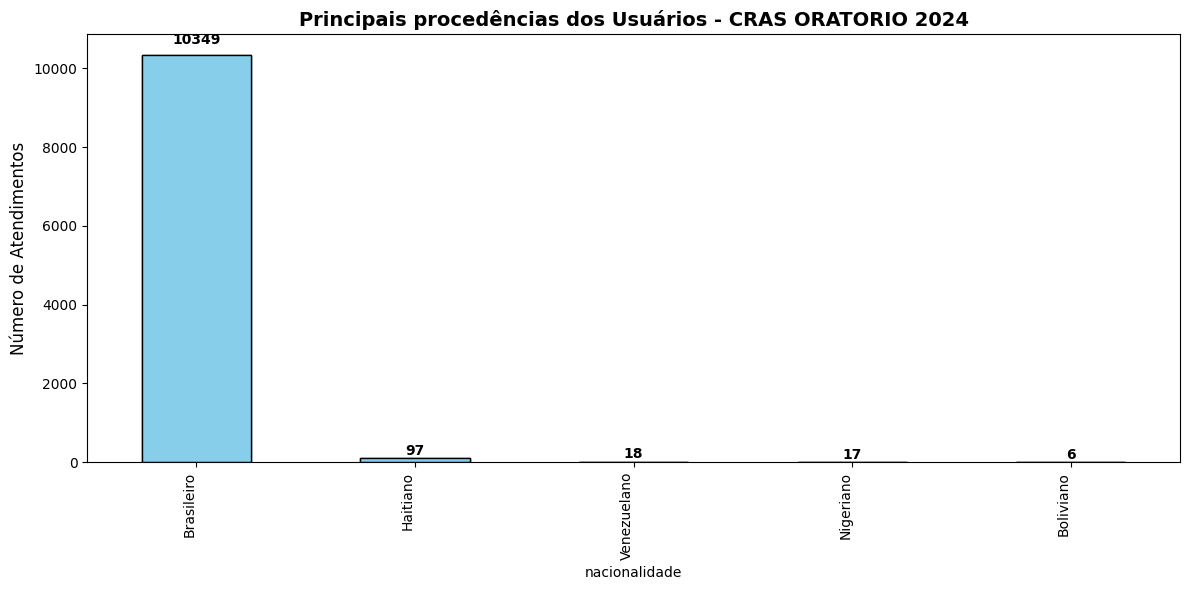

<Figure size 1200x600 with 0 Axes>

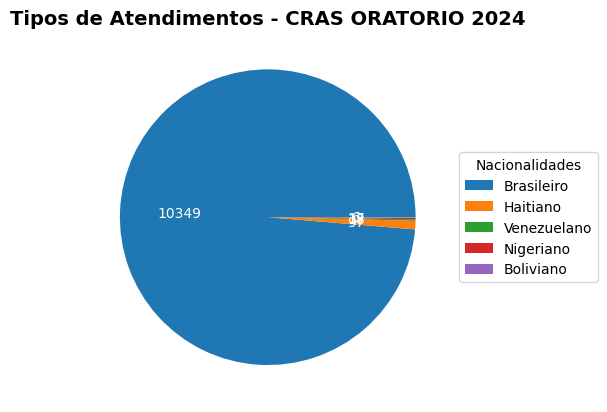

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

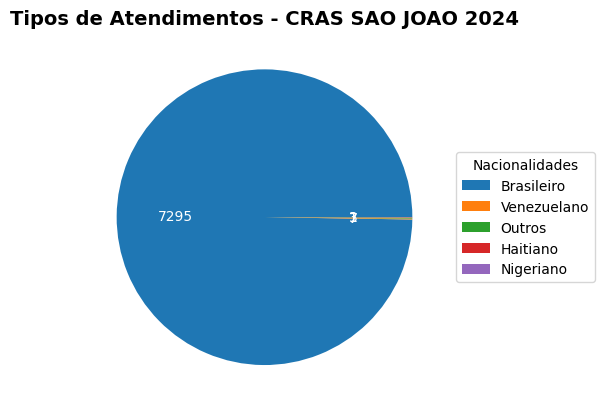

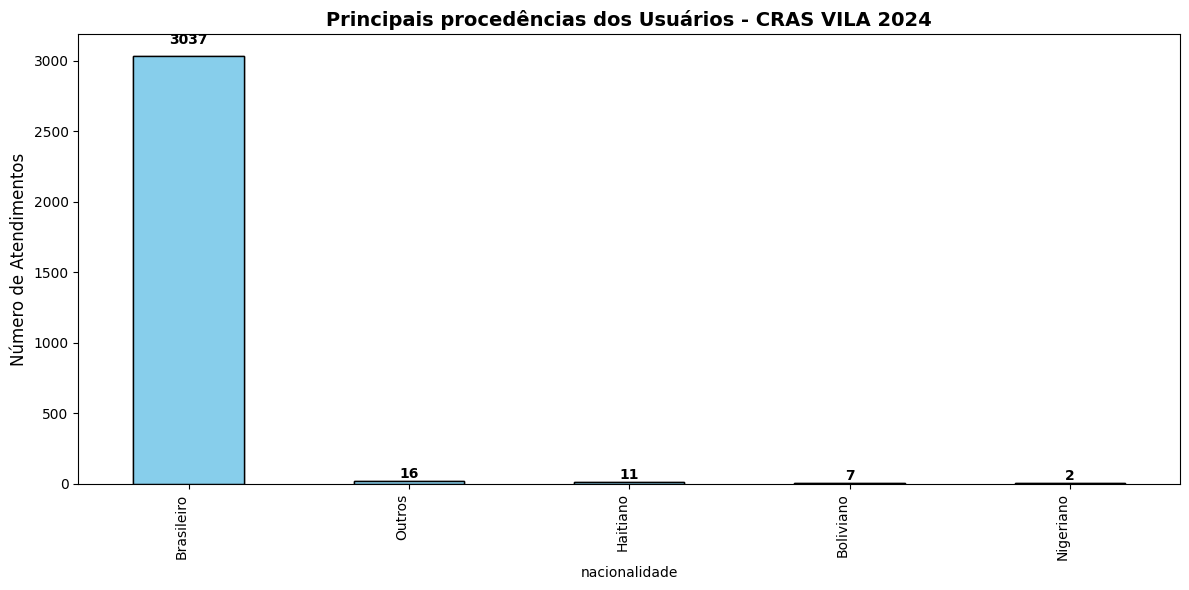

<Figure size 1200x600 with 0 Axes>

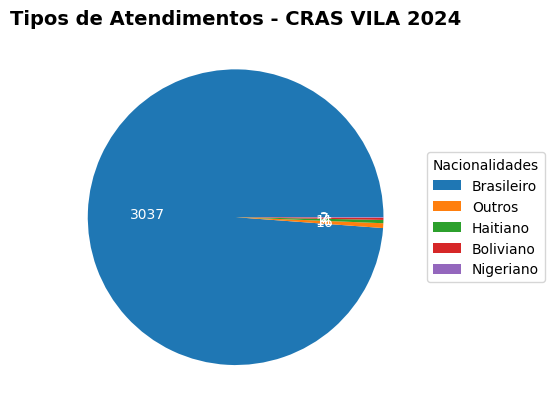

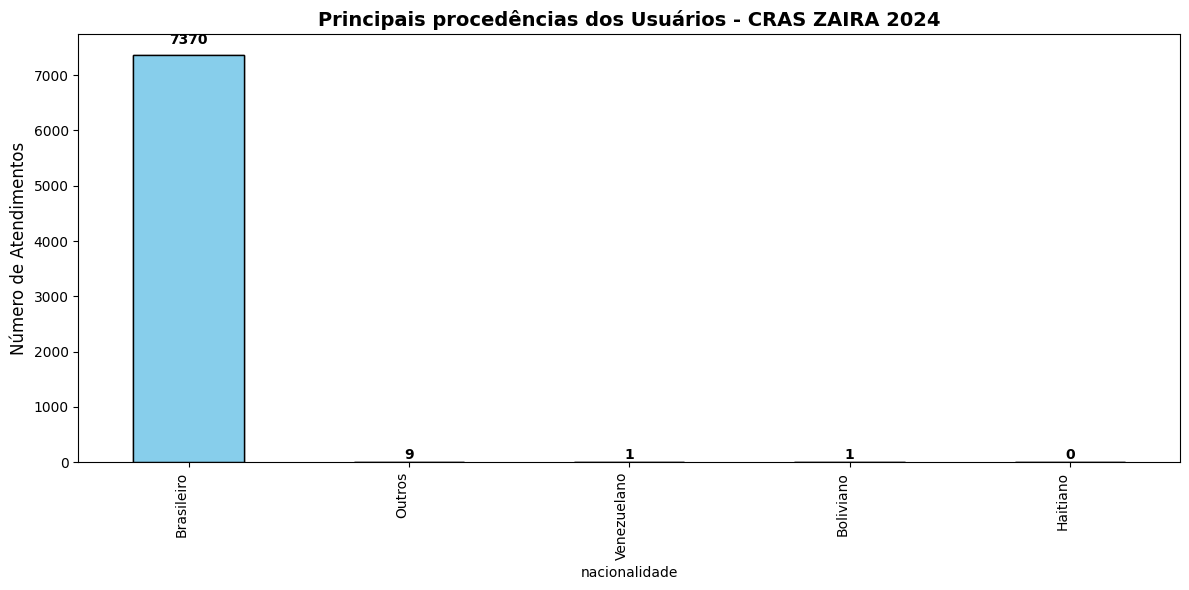

<Figure size 1200x600 with 0 Axes>

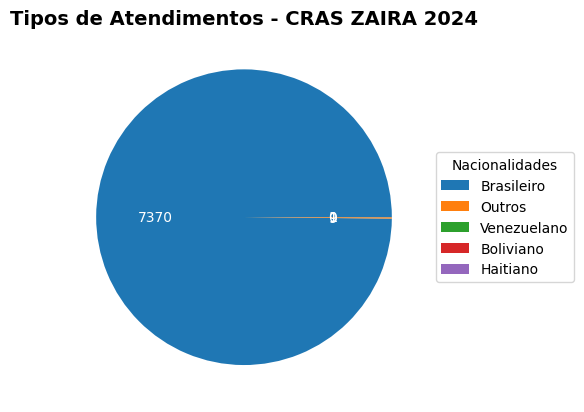

In [197]:
# Plot País de Origem

for cras in lista_cras:
    nacionalidade=dados_nacionalidade[dados_nacionalidade['Unidade']==cras]
    # print(nacionalidade)
    nacionalidade.index=nacionalidade['nacionalidade'].iloc[:len(nacionalidade)]
    nacionalidade=nacionalidade.loc[:,'Janeiro':'Dezembro']
    # print(nacionalidade)
    # Somar o total por demanda ao longo do ano
    total_nacionalidade = nacionalidade.sum(axis=1)

    # Definir os índices corretamente
    # nacionalidade.index = lista_nacionalidade[:len(nacionalidade)]
    top_tipo_nacionalidade = total_nacionalidade.sort_values(ascending=False).head(5)
    plt.figure(figsize=(12,6))
    top_tipo_nacionalidade.plot(kind="bar",color="skyblue",edgecolor="black")
    plt.title(f"Principais procedências dos Usuários - {cras} 2024", fontsize=14, fontweight='bold')
    plt.ylabel("Número de Atendimentos", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", alpha=0.3)
    # salva o gráfico em "ax"
    ax = top_tipo_nacionalidade.plot(kind="bar", color="skyblue", edgecolor="black")
    
    #rótulo de dados
    for i, v in enumerate(top_tipo_nacionalidade):
        ax.text(i, v + (v*0.02), str(int(v)), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()# Somar o total por demanda ao longo do ano

    # Gráfico de Pizza

    def func(pct,valor):
        # absolute = int(np.round(pct/100.*np.sum(allvals)))
        valores=np(valor)
        return f"{valor}"
    
    plt.figure(figsize=(12,6))
    fig,ax = plt.subplots()
    plt.title(f"Tipos de Atendimentos - {cras} 2024", fontsize=14, fontweight='bold')
    labels=top_tipo_nacionalidade.reset_index()
    dados=top_tipo_nacionalidade
    data = [x for x in dados]
    # print(data)
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute:d}"
    wedges, text, autotext = ax.pie(dados, autopct=lambda pct: func(pct,data),
                                  textprops=dict(color="w"))
    ax.legend(wedges,top_tipo_nacionalidade.index,
              title="Nacionalidades",
              loc='center left',
              bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()